In [1]:
import librosa
from librosa import display
from librosa import feature

import numpy as np
from numpy import typing as npt

from matplotlib import pyplot as plt

In [2]:
y, sr = librosa.load("./Mozart_Turkish_March.wav", duration=45)

In [3]:
def plot_path_enhance_similarity(y: npt.ArrayLike, sr: int, smoothing: bool = True, hop_length: int = 2048) -> None :
  '''
  To visualize the path enhanced similarity matrix of the signal

  y: signal to be analyzed
  sr: sampling rate
  smoothing: to smooth signal or not
  hop_size
  '''


  chroma = librosa.feature.chroma_cqt(y=y, sr=sr, hop_length=hop_length)
  chroma_stack = librosa.feature.stack_memory(chroma, n_steps=10, delay=3)

  rec = librosa.segment.recurrence_matrix(chroma_stack, mode='affinity', self=True)
  
  if smoothing :
    rec_smooth = librosa.segment.path_enhance(rec, 51, window='hann', n_filters=7)
    imgpe = librosa.display.specshow(rec_smooth, x_axis='s', y_axis='s',
                          hop_length=hop_length)
    plt.title("Multi-angle enhanced recurrence")
    plt.colorbar()

  else :
    img = librosa.display.specshow(rec, x_axis='s', y_axis='s',
                          hop_length=hop_length)
    plt.title("Unfiltered recurrence")
    plt.colorbar()

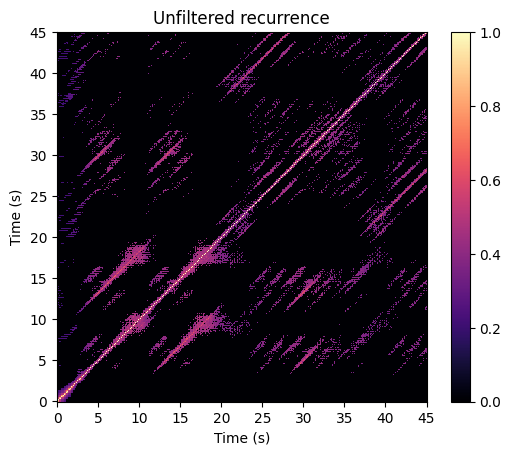

In [5]:
plot_path_enhance_similarity(y, sr, smoothing=False)

In [12]:
def plot_self_similarity(y_ref: npt.ArrayLike, sr: int, affinity: bool = False, hop_length: int = 1024) -> None:
  '''
  To visualize the similarity matrix of the signal

  y_ref: reference signal
  y_comp: signal to be compared
  sr: sampling rate
  affinity: to use affinity or not
  hop_size
  '''


  # Pre-processing stage
  chroma = librosa.feature.chroma_cqt(y=y_ref, sr=sr, hop_length=hop_length)
  chroma_stack = librosa.feature.stack_memory(chroma, n_steps=10, delay=3)


  if not affinity  :
    R = librosa.segment.recurrence_matrix(chroma_stack, k=5)
    imgsim = librosa.display.specshow(R, x_axis='s', y_axis='s',
                                      hop_length=hop_length)
    plt.title('Binary recurrence (symmetric)')
    plt.colorbar()
  
  else :
    R_aff = librosa.segment.recurrence_matrix(chroma_stack, metric='cosine',mode='affinity')
    imgaff = librosa.display.specshow(R_aff, x_axis='s', y_axis='s',
                                      cmap='magma_r', hop_length=hop_length)
    plt.title('Affinity recurrence')
    plt.colorbar()

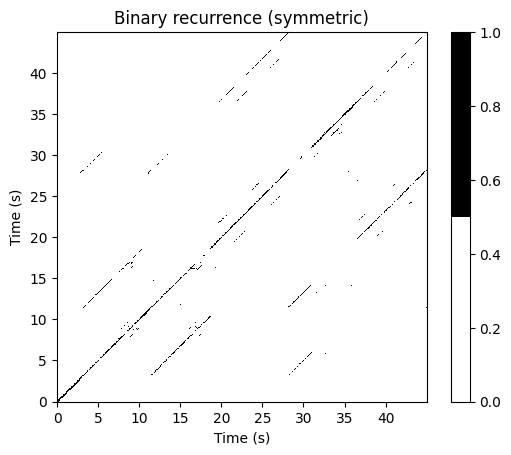

In [13]:
plot_self_similarity(y, sr)